# Homework 7
# CSCE 633
## Arya Rahmanian
### Summer 2024

## Data Exploration

### Load Data

In [83]:
import pandas as pd

data_path = 'wine/wine.data'

column_names = [
    'Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]
wine_data = pd.read_csv(data_path, names=column_names)

wine_features = wine_data.drop(columns=['Label'])

wine_features.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Plot Distributions

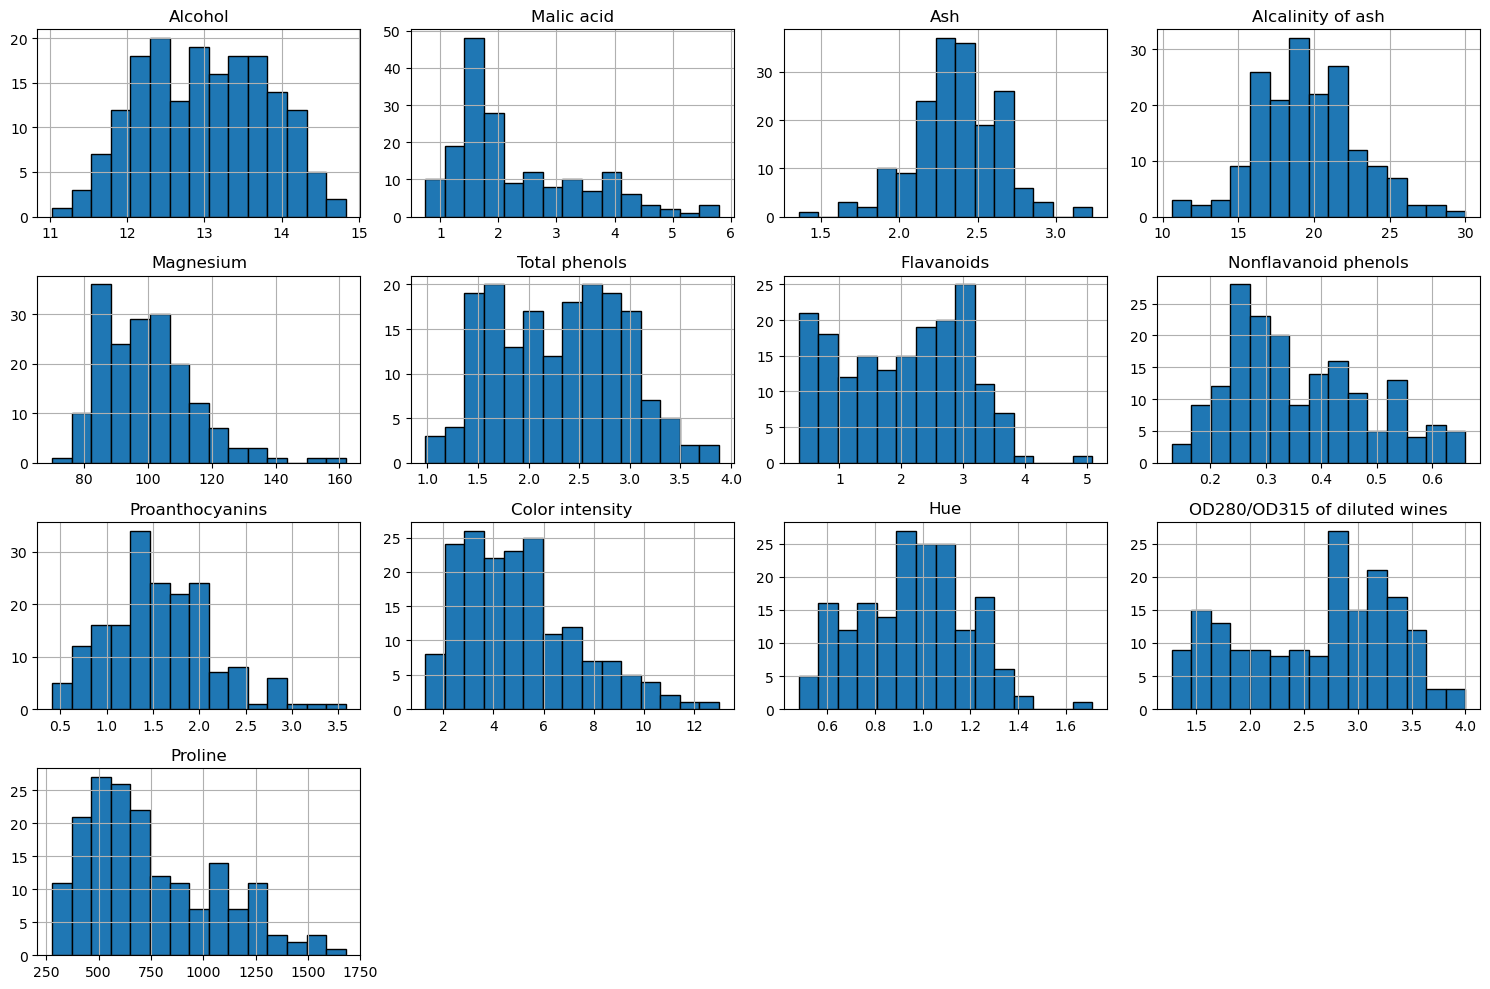

In [85]:
import matplotlib.pyplot as plt
wine_features.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.tight_layout()
plt.show()

##### Analysis:
Many variables exhibit right-skewness, suggesting that most wines have lower values for these features. This shows that these features are not normally distributed and would benefit with transformation/normalization for  models.

Variables like Alcohol, Alcalinity of Ash, and Magnesium have a wider spread. This is indicative of differences in the winemaking process or grape characteristics.

On the other hand, some features such as Ash and Nonflavanoid Phenols, are more symmetric, suggesting a more consistent presence across different wine types.

One of the more skewed varible is Malic acid. This variable has a strong right-skewed distribution.


### Correlation Matrix via heatmap

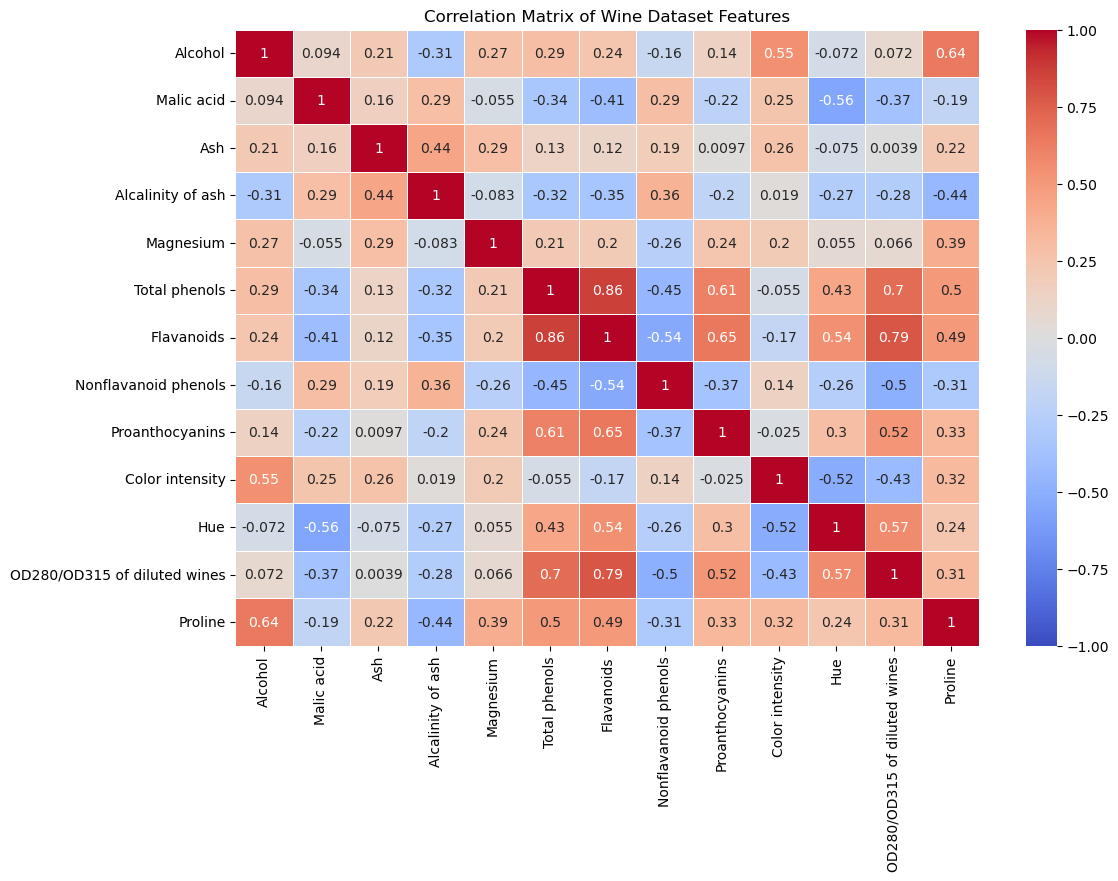

In [88]:
import seaborn as sns
import numpy as np

correlation_matrix = wine_features.corr()

#plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

Strong Positive Correlations:

Flavanoids and Total phenols (0.86): Shows that higher flavonoid content is associated with higher total phenol content.
OD280/OD315 of diluted wines and Flavanoids (0.79): Wines with higher flavonoid content tend to have higher OD280/OD315 values.
OD280/OD315 of diluted wines and Total phenols (0.74): Higher total phenol content is associated with higher OD280/OD315 values.

Strong Negative Correlations:

Flavanoids and Nonflavanoid phenols (-0.34): Suggests that wines with higher flavonoid content tend to have lower nonflavonoid phenol content.

Alcohol and Acidity: The negative correlation between alcohol and malic acid implies that wines with higher alcohol content tend to have lower acidity, which might influence the wine's taste and aging potential.

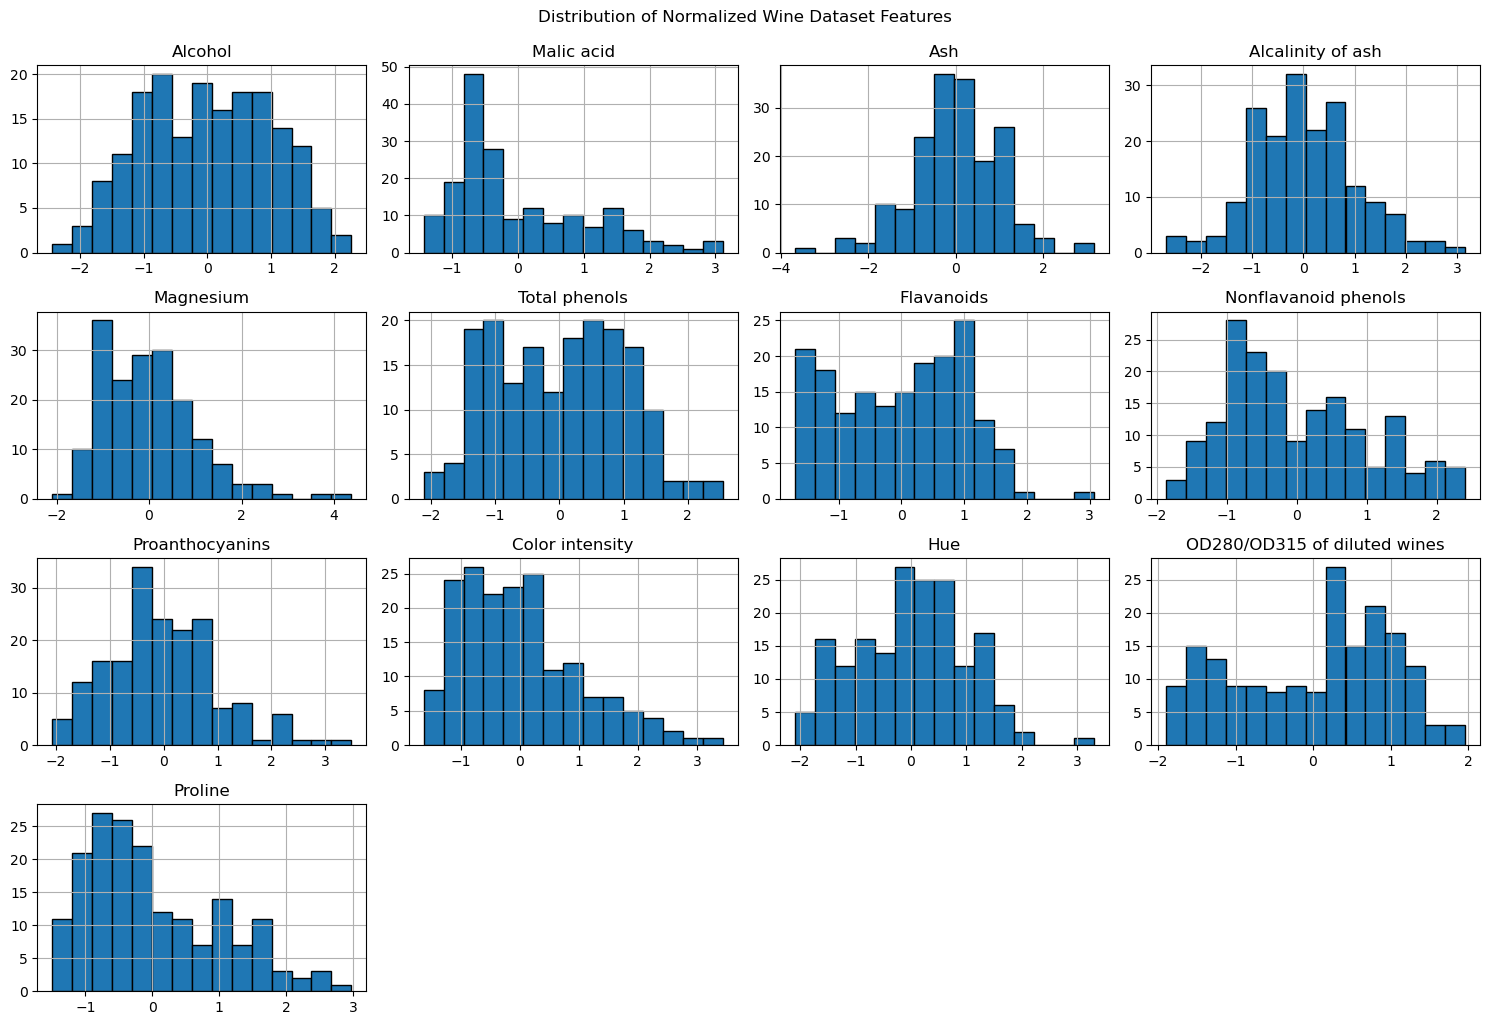

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit the data
normalized_features = scaler.fit_transform(wine_features)

# convert back into df
normalized_features_df = pd.DataFrame(normalized_features, columns=wine_features.columns)

normalized_features_df.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.tight_layout()
plt.suptitle('Distribution of Normalized Wine Dataset Features', y=1.02)
plt.show()


## K Means Clustering

### Choose Number of Clusters

C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

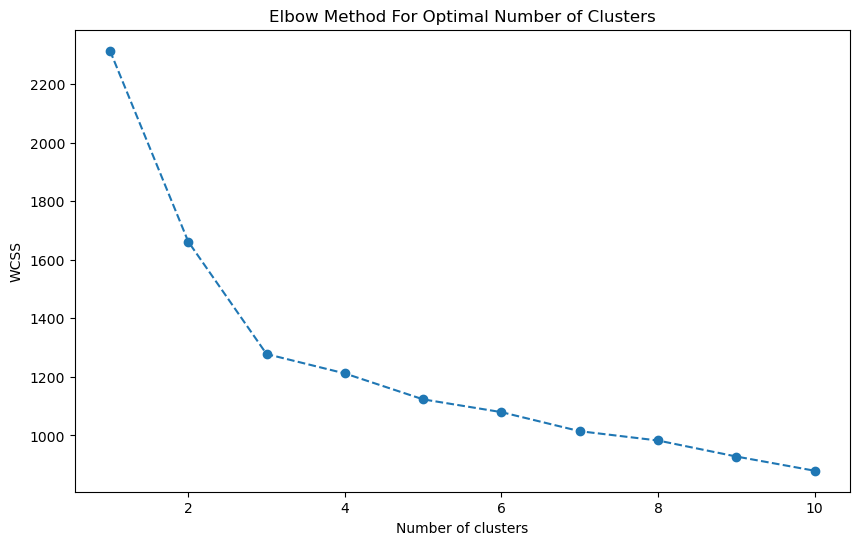

In [136]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided

# plot kmeans loss graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

3 is the elbow point, hence the optimal number of clusters

### K means results

In [141]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_features)

# get cluster assignments and centers
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

wine_data['Cluster'] = cluster_labels

# counter number of wine in each cluster
cluster_counts = wine_data['Cluster'].value_counts()

print("Number of wines in each cluster:")
print(cluster_counts)

# print center of each cluster
centroids_df = pd.DataFrame(cluster_centroids, columns=wine_features.columns)
print("\n")
print("Centroid of each cluster:")
print(centroids_df)

Number of wines in each cluster:
Cluster
0    65
2    62
1    51
Name: count, dtype: int64


Centroid of each cluster:
    Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0        -0.901914  0.461804                      0.270764 -0.753846  
1         0.941539 -1.164789                     -1.292412 -0.407088  
2         0.171063  0.473984                      0.779247  1.125185  


C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Gaussian Mixture Model

### Choosing Number of Clusters

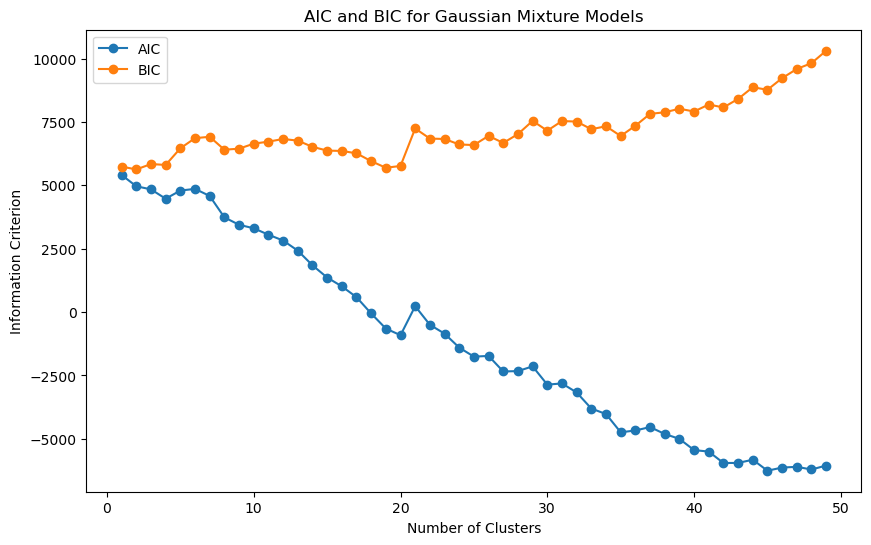

Optimal number of clusters according to AIC: 45
Optimal number of clusters according to BIC: 2


In [153]:
from sklearn.mixture import GaussianMixture
import warnings

n_components_range = range(1, 50)
aic = []
bic = []

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    # Your loop
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(normalized_features)
        aic.append(gmm.aic(normalized_features))
        bic.append(gmm.bic(normalized_features))

# Plot AIC and BIC
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Gaussian Mixture Models')
plt.legend()
plt.show()

# get the optiminal number of clusters for each info criterion
optimal_clusters_aic = n_components_range[aic.index(min(aic))]
optimal_clusters_bic = n_components_range[bic.index(min(bic))]

print(f'Optimal number of clusters according to AIC: {optimal_clusters_aic}')
print(f'Optimal number of clusters according to BIC: {optimal_clusters_bic}')

Although AIC kept going down as I increased clusters, I highly doubt that this is the optimum number of clusters as it must be overfitting. So I will be using the optimal BIC cluster that I found, 2.

### GMM Results

In [168]:
gmm = GaussianMixture(n_components=optimal_clusters_bic, random_state=42)
gmm.fit(normalized_features)

# Compute mean and covariance
means = gmm.means_
covariances = gmm.covariances_

# mean and covariance for each component
for i in range(optimal_clusters_bic):
    print(f"Component {i + 1}:")
    print(f"Mean:\n{means[i]}")
    print(f"Covariance:\n{covariances[i]}\n")

Component 1:
Mean:
[-0.04045089 -0.32763895 -0.05238685 -0.18960484  0.00979468  0.43668243
  0.54930917 -0.31361432  0.37811623 -0.353714    0.47214391  0.58004064
  0.17754483]
Covariance:
[[ 1.23894254e+00  1.11210762e-02  2.24779532e-01 -5.56991124e-01
   4.34482082e-01  4.45290688e-01  4.18556106e-01 -3.11509120e-01
   1.71987970e-01  5.87987875e-01  1.49549176e-02  1.80921375e-01
   9.67495751e-01]
 [ 1.11210762e-02  5.99727151e-01  8.91315754e-02  8.38720776e-02
   1.17379508e-02  3.72250916e-02  2.17996375e-02  3.69366404e-02
   6.76304171e-02 -7.41167933e-02 -2.21584583e-01  7.77179666e-02
  -8.81081695e-02]
 [ 2.24779532e-01  8.91315754e-02  1.09515572e+00  3.36668687e-01
   3.12226628e-01  2.11114472e-01  2.47168292e-01  2.19774753e-01
  -2.48475213e-02  1.84731939e-01  1.70675931e-02  8.60484782e-02
   3.46583629e-01]
 [-5.56991124e-01  8.38720776e-02  3.36668687e-01  1.01782189e+00
  -1.73618225e-01 -2.22635242e-01 -1.89495205e-01  3.37191570e-01
  -1.88540195e-01 -3.48034

C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1500x500 with 0 Axes>

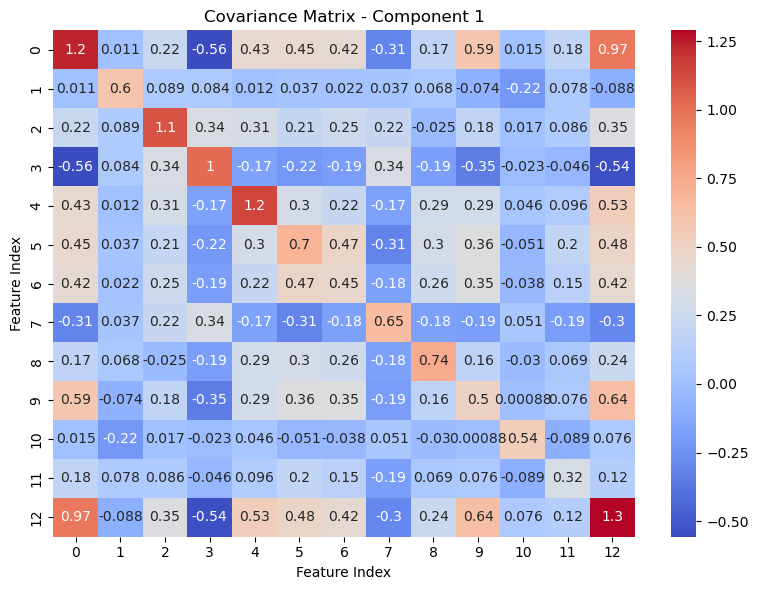

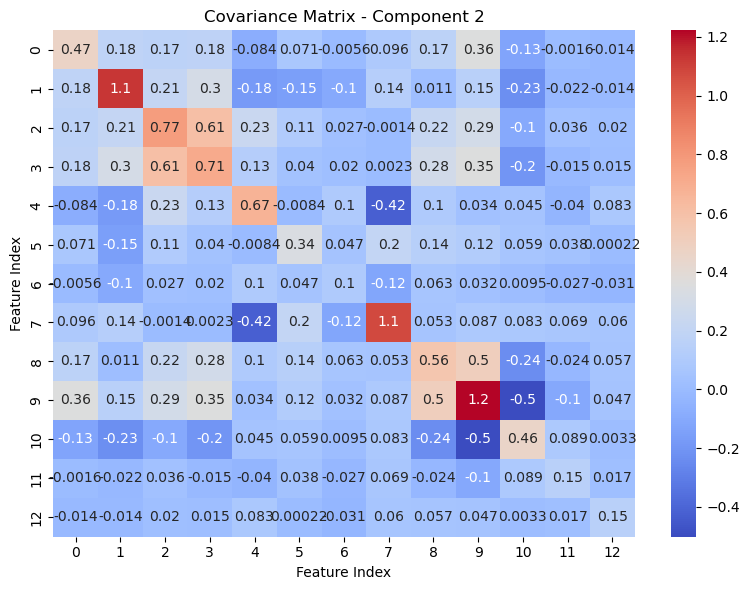

In [170]:
plt.figure(figsize=(15, 5))
for i in range(optimal_clusters_bic):
    plt.figure(figsize=(8, 6))  # Create a new figure for each heatmap
    sns.heatmap(covariances[i], cmap='coolwarm', annot=True, cbar=True)
    plt.title(f'Covariance Matrix - Component {i + 1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Index')
    plt.tight_layout()
    plt.show()

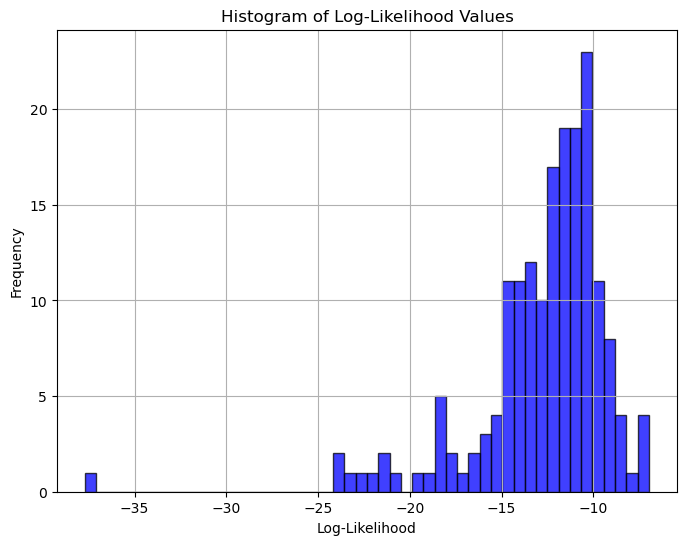

In [171]:
# find log likelihood of each data sample
log_likelihood = gmm.score_samples(normalized_features)

# plot log-likelihood values
plt.figure(figsize=(8, 6))
plt.hist(log_likelihood, bins=50, alpha=0.75, color='b', edgecolor='black')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Likelihood Values')
plt.grid(True)
plt.show()

## Principal Component Analysis

### Choosing the number of principal components

In [106]:
from sklearn.decomposition import PCA
#PCA with 6 components
pca = PCA(n_components=6)
pca.fit(wine_features)

#print explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratios):
    print(f"PC{i + 1}: {ratio:.4f}")

Explained Variance Ratios:
PC1: 0.9981
PC2: 0.0017
PC3: 0.0001
PC4: 0.0001
PC5: 0.0000
PC6: 0.0000


#### Plotting Explained Variance ratios of PC

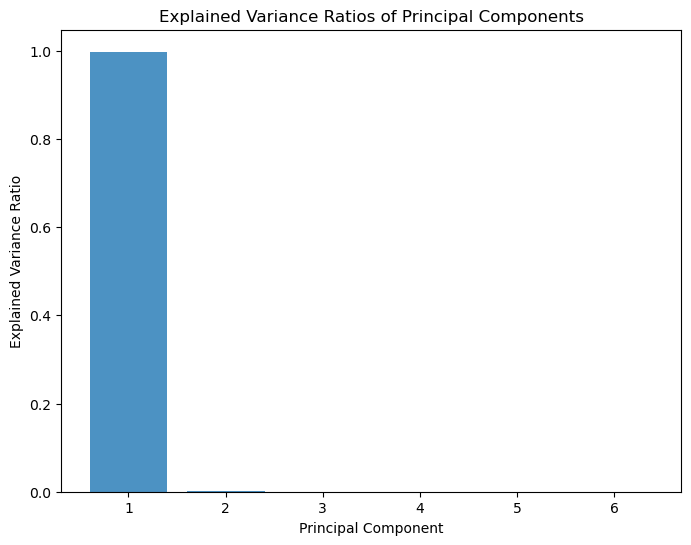

In [107]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center', alpha=0.8)
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratios of Principal Components')
plt.show()

I only need one, maybe two principal components. But I will continue with 2

### PCA Before Cluster

C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


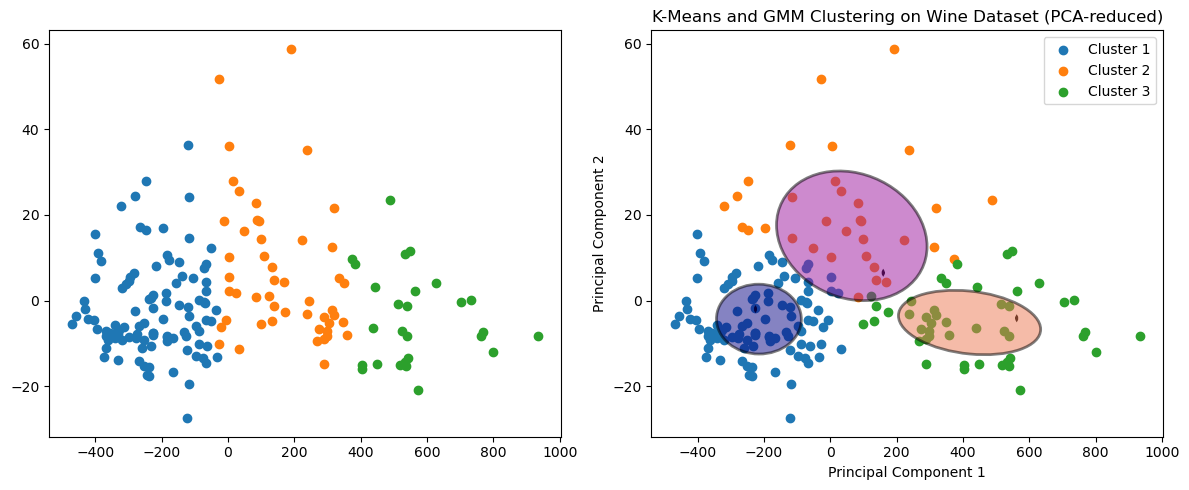

In [177]:
import matplotlib.patches as mpatches
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_features)

#K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(wine_pca)

#GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(wine_pca)

#K-Means clusters plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cluster in range(3):
    plt.scatter(wine_pca[kmeans_labels == cluster, 0], wine_pca[kmeans_labels == cluster, 1], label=f'Cluster {cluster + 1}')

# GMM clusters
plt.subplot(1, 2, 2)
for cluster in range(3):
    plt.scatter(wine_pca[gmm_labels == cluster, 0], wine_pca[gmm_labels == cluster, 1], label=f'Cluster {cluster + 1}')

#circles for K-Means clusters
for center in kmeans.cluster_centers_:
    circle = plt.Circle(center, 0.3, color='black', fill=False, linewidth=2, zorder=2)
    plt.gca().add_artist(circle)

#ellipses for GMM clusters
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    vx, vy = eigenvectors[:,0][0], eigenvectors[:,0][1]
    theta = np.degrees(np.arctan2(vy, vx))
    color = plt.cm.plasma(float(i) / 3)
    ell = mpatches.Ellipse(mean, 2*np.sqrt(eigenvalues[0]), 2*np.sqrt(eigenvalues[1]), angle=theta, facecolor=color, edgecolor='black', linewidth=2, zorder=2)
    ell.set_clip_box(plt.gca().bbox)
    ell.set_alpha(0.5)
    plt.gca().add_patch(ell)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means and GMM Clustering on Wine Dataset (PCA-reduced)')
plt.legend()
plt.tight_layout()
plt.show()

### Evaluation

In [183]:
from sklearn.metrics import silhouette_score

def evaluate_clustering(X, method, n_clusters=0, n_components=0, random_state=42):
    if method == 'kmeans':
        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
        labels = clusterer.fit_predict(X)
    elif method == 'gmm':
        clusterer = GaussianMixture(n_components=n_components, random_state=random_state)
        labels = clusterer.fit_predict(X)
    elif method == 'pca_kmeans':
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X)
        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
        labels = clusterer.fit_predict(X_pca)
    elif method == 'pca_gmm':
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X)
        clusterer = GaussianMixture(n_components=n_components, random_state=random_state)
        labels = clusterer.fit_predict(X_pca)
    else:
        raise ValueError("Invalid method. Choose from 'kmeans', 'gmm', 'pca_kmeans', or 'pca_gmm'.")

    score = silhouette_score(X, labels)
    return score

# Evaluate each method
kmeans_score = evaluate_clustering(wine_features, 'kmeans', n_clusters=3, random_state=42)
gmm_score = evaluate_clustering(wine_features, 'gmm', n_components=3, random_state=42)
pca_kmeans_score = evaluate_clustering(wine_features, 'pca_kmeans', n_clusters=3, n_components=2, random_state=42)
pca_gmm_score = evaluate_clustering(wine_features, 'pca_gmm', n_components=2, random_state=42)

print(f"Silhouette Score for K-Means: {kmeans_score:.5f}")
print(f"Silhouette Score for GMM: {gmm_score:.5f}")
print(f"Silhouette Score for PCA + K-Means: {pca_kmeans_score:.5f}")
print(f"Silhouette Score for PCA + GMM: {pca_gmm_score:.5f}")

C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Airsight\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

Silhouette Score for K-Means: 0.55958
Silhouette Score for GMM: 0.34727
Silhouette Score for PCA + K-Means: 0.55958
Silhouette Score for PCA + GMM: 0.64166
